In [16]:
pip install pandas numpy seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   CustomerID  Age  Gender  Income Region  MonthlySpend  PurchaseFrequency  \
0           1   25    Male   50000  North           200                  5   
1           2   45  Female   80000  South           350                  8   
2           3   32    Male   62000   East           150                  4   
3           4   58  Female   95000   West           400                 10   
4           5   33    Male   47000  North           180                  3   
5           6   28  Female   54000  South           220                  6   
6           7   41    Male   80000   East           300                  7   
7           8   60  Female   96000   West           500                  9   
8           9   50    Male   65000  North           250                  5   
9          10   29  Female   50000   East           220                  6   

   ActivityScore  
0             85  
1             95  
2             60  
3             80  
4             70  
5             72  
6       

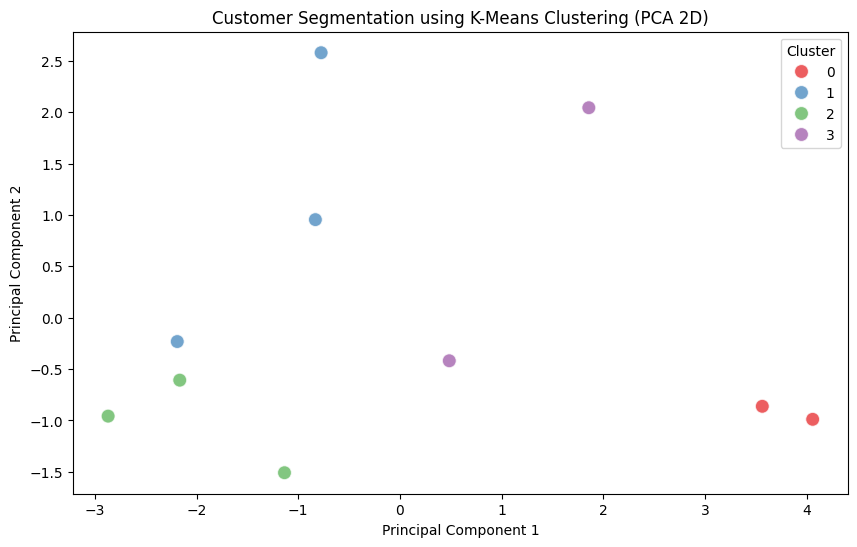

TypeError: agg function failed [how->mean,dtype->object]

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Example Dataset: You can replace this with your actual customer data.
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [25, 45, 32, 58, 33, 28, 41, 60, 50, 29],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Income': [50000, 80000, 62000, 95000, 47000, 54000, 80000, 96000, 65000, 50000],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'East'],
    'MonthlySpend': [200, 350, 150, 400, 180, 220, 300, 500, 250, 220],
    'PurchaseFrequency': [5, 8, 4, 10, 3, 6, 7, 9, 5, 6],
    'ActivityScore': [85, 95, 60, 80, 70, 72, 90, 88, 75, 77]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the dataset
print(df)

# Step 1: Data Preprocessing
# Handle missing values if necessary (we'll assume data is clean for now)

# Convert categorical columns to numerical (one-hot encoding for 'Gender' and 'Region')
df_encoded = pd.get_dummies(df, columns=['Gender', 'Region'], drop_first=True)

# Step 2: Standardize the data
features = df_encoded.drop(columns=['CustomerID'])  # Drop CustomerID as it's not useful for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply K-Means Clustering
# Choose the number of clusters (K)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Step 4: Visualize the clusters using PCA for dimensionality reduction
# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA components and the cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Plot the clusters in 2D using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segmentation using K-Means Clustering (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 5: Analyze the Segments
# Group by cluster and calculate the mean of each feature
cluster_summary = df.groupby('Cluster').mean()

# Display the summary of the clusters
print("Cluster Summary (Average values for each feature per cluster):")
print(cluster_summary)